So far, we've been using Train-Test Split method by spliting the data set into training and testing sets and use the training set 
to train the model and testing set to test the model. 
We then evaluate the model performance based on an error metric to determine the accuracy of the model. This method however, is not 
very reliable as the accuracy obtained for one test set can be very different to the accuracy obtained for a different test set. 

K-fold Cross Validation(CV) provides a solution to this problem by dividing the data into folds and ensuring that each fold is used as a 
testing set at some point.

K-Fold CV is where a given data set is split into a K number of sections/folds where each fold is used as a testing set at some point.

The choice of k is usually 5 or 10, but there is no formal rule.

Imagine we have a data sample with 12 items

The first step is to pick a value for k in order to determine the number of folds used to split the data. Here, we will use a value 
of k=4. That means we will shuffle the data and then split the data into 4 groups. Because we have 12 items,each group will 
have an equal number of 3 items in it's fold

[1,2,3,4,5, 6,7,8,9,10,11,12]

Fold 1: [2,3,4]
Fold 2: [1,6,7]
Fold 3: [8,10,11]
Fold 4: [5,9,12]

We can then use the folds for our training and testing like:

Model1: Trained on Fold1 + Fold2 + Fold3, Tested on Fold4
Model2: Trained on Fold1 + Fold2 + Fold4, Tested on Fold3
Model3: Trained on Fold1 + Fold3 + Fold4, Tested on Fold2
Model4: Trained on Fold2 + Fold3 + Fold4, Tested on Fold1

The skill scores are then collected for each model and summarized for use.

**KFold Cross Validation : This is a real world example of KFold Cross Validation using HR data. What is the best algorithm to use? Support Vector Machine, Random Forest Classifier or Logistic Regression**

In [528]:
''' In this example, we need to determine which columns are relevant in regards to employee Pay Band. In our example below, there are 9 possible outcomes.

 Pay_Band_Desc : We need to determine the Pay Band for a new employee based on all the x independent variables."Pay Band Desc" will be your dependent y column.

Pay_Band_Desc	SalaryAmount
Low Band 1        	20000
Low Band 2        	25000
Low Band 3        	28000
Medium Band 1     	30000
Medium Band 2     	38000
Medium Band 3     	45000
High Band 1       	55000
High Band 2       	65000
High Band 3       	80000

SalaryAmount : lookup values for Pay_Band_Desc

Satisfaction_Level_At_Interview : This is your score grade at the interview. 1 = Highest , 0 = Lowest
Department : Employeee department
Education : Employee education
Years_Of_Experience : Employee years of experience 
Gender : Male or Female
Age : Employee age
AgeBand: Grouping employee age into bands ie 16 to 19 years is Band 1
'''
import numpy as np
import pandas as pd
import pyodbc
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split


# Step 1: get your data from SQL Server and assign it to a pandas variable
conn_str = pyodbc.connect('Driver={SQL Server};' 'Server=LAPTOP-CHKIB79A;''Database=Tutorial;''Trusted_Connection=yes;')
query_str = "SELECT  [Satisfaction_Level_At_Interview],[Department],[Pay_Band_Desc],[SalaryAmount],[Education] \
      ,[Years_Of_Experience],[Gender],[Age],[AgeBand] FROM [Tutorial].[dbo].[HR_EmployeePayBandActual]" 
df = pd.read_sql(sql=query_str, con=conn_str)
df.head()

,Satisfaction_Level_At_Interview,Department,Pay_Band_Desc,SalaryAmount,Education,Years_Of_Experience,Gender,Age,AgeBand
0,0.0,accounting,Low Band 1,20000,No Degree,None,Female,22,Band 2
1,0.0,accounting,Low Band 1,20000,No Degree,None,Female,30,Band 4
2,0.0,accounting,Low Band 1,20000,No Degree,None,Female,34,Band 4
3,0.0,accounting,Low Band 1,20000,No Degree,None,Female,40,Band 6
4,0.0,accounting,Low Band 1,20000,No Degree,None,Female,41,Band 6


In [529]:
# Step 2: This is where we will do a lot of data analysis in order to figure out the important independent variables x that have an effect on dependent variable y.

# From the averages below, it is save to conclude that the bigger the Satisfaction_Level_At_Interview, the bigger your salary, hence, you are likely to be 
# in the higher pay band. We can also conclude that the independent variable Age is irrelevant. Hmmmm... what about the AgeBand ? We will see.
averages = df.groupby(df.Pay_Band_Desc).mean()
averages

,Satisfaction_Level_At_Interview,SalaryAmount,Age
Pay_Band_Desc,,,
High Band 1,0.739370,55000.0,36.062992
High Band 2,0.867442,65000.0,37.488372
High Band 3,0.875352,80000.0,37.676056
Low Band 1,0.326402,20000.0,37.273694
Low Band 2,0.617710,25000.0,36.607908
Low Band 3,0.349314,28000.0,32.647059
Medium Band 1,0.643974,30000.0,37.943508
Medium Band 2,0.667089,38000.0,36.405063
Medium Band 3,0.867241,45000.0,37.158046


,Avg Salary
Department,
IT,32861.256545
RandD,33482.412060
accounting,28246.478873
hr,25545.801527
management,31205.047319
marketing,32754.716981
product_mng,32921.568627
sales,30193.877551
support,30900.432900


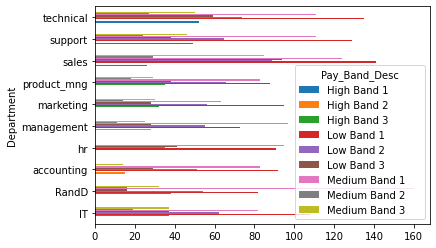

In [530]:
# Since Department,Education ,Years_Of_Experience ,Gender and AgeBand are textual and exluded from the step above, we need a separate groupby to see if these 
# columns are relevant.

# Let's get a bar chat to display Department. From the Department bar chat, we can conclude that this column is not relevant. We can come to the same conclusion from 
# the groupby query

pd.crosstab(df.Department,df.Pay_Band_Desc).plot(kind='barh')

df1 = df.groupby(["Department"]).agg({'SalaryAmount': ['mean']})
df1.columns = ["Avg Salary"]
df1

In [531]:
# We can easily conclude that the better education you have, the higher your salary ( higher pay band). Education is relevant.
df2 = df.groupby(["Education"]).agg({'SalaryAmount': ['mean']})
df2.columns = ["Avg Salary"]
df2

,Avg Salary
Education,
First Degree,34747.317073
Masters,75149.253731
No Degree,21912.545235
PhD,80000.000000


In [532]:
# We can easily conclude that the more experience you have, the higher your salary ( higher pay band). Years_Of_Experience is relevant.
df3 = df.groupby(["Years_Of_Experience"]).agg({'SalaryAmount': ['mean']})
df3.columns = ["Avg Salary"]
df3

,Avg Salary
Years_Of_Experience,
1 Yr,24666.666667
2 Yrs,26738.127544
3 Yrs,30000.000000
4 Yrs,31870.117188
5+ Yrs,54443.750000
None,20000.000000


In [533]:
# Is Gender relevant? The answer is NO. We can ignore this column in our final analysis.
df4 = df.groupby(["Gender"]).agg({'SalaryAmount': ['mean']})
df4.columns = ["Avg Salary"]
df4

,Avg Salary
Gender,
Female,30996.842105
Male,31102.732794


In [534]:
# Lastly, we know that Age is irrelevant. But what about if we use AgeBand? We can come to the same conclusion that AgeBrand is also irrelevan

df4 = df.groupby(["AgeBand"]).agg({'SalaryAmount': ['mean']})
df4.columns = ["Avg Salary"]
df4

,Avg Salary
AgeBand,
Band 1,29926.470588
Band 2,31722.488038
Band 3,27125.000000
Band 4,30398.963731
Band 5,32208.651399
Band 6,30489.383215
Band 7,30851.370851
Band 8,35218.045113


In [535]:
# Step 3: Now that we've completed our analysis, we can come to the conclusion that the relevant independent variable x that affects dependent variable y (Pay_Band_Des)
# are : Satisfaction_Level_At_Interview	,Education and Years_Of_Experience. These are our independent variables x. Since Education and Years_Of_Experience are text,
# we need to get the corresponding numbers for these 2 variables texts.

# Let's get numbers for Education column using LabelEncoder
from sklearn.preprocessing import LabelEncoder
le_education = LabelEncoder() # get LabelEncoder() class
df['Education_n'] = le_education.fit_transform(df['Education']) # add new column Education_n to your dataframe and fit transform
df.head()

,Satisfaction_Level_At_Interview,Department,Pay_Band_Desc,SalaryAmount,Education,Years_Of_Experience,Gender,Age,AgeBand,Education_n
0,0.0,accounting,Low Band 1,20000,No Degree,None,Female,22,Band 2,2
1,0.0,accounting,Low Band 1,20000,No Degree,None,Female,30,Band 4,2
2,0.0,accounting,Low Band 1,20000,No Degree,None,Female,34,Band 4,2
3,0.0,accounting,Low Band 1,20000,No Degree,None,Female,40,Band 6,2
4,0.0,accounting,Low Band 1,20000,No Degree,None,Female,41,Band 6,2


In [536]:
# Let's get numbers for Years_Of_Experience column 
le_experience = LabelEncoder() # get LabelEncoder() class
df['Experience_n'] = le_experience.fit_transform(df['Years_Of_Experience']) # add new column Experience_n to your dataframe and fit transform
df.head()


,Satisfaction_Level_At_Interview,Department,Pay_Band_Desc,SalaryAmount,Education,Years_Of_Experience,Gender,Age,AgeBand,Education_n,Experience_n
0,0.0,accounting,Low Band 1,20000,No Degree,None,Female,22,Band 2,2,5
1,0.0,accounting,Low Band 1,20000,No Degree,None,Female,30,Band 4,2,5
2,0.0,accounting,Low Band 1,20000,No Degree,None,Female,34,Band 4,2,5
3,0.0,accounting,Low Band 1,20000,No Degree,None,Female,40,Band 6,2,5
4,0.0,accounting,Low Band 1,20000,No Degree,None,Female,41,Band 6,2,5


In [537]:
# Let's drop all the irrelevant columns  in order to get independent variables x
# get columns for x
x = df.drop(['Department', 'Pay_Band_Desc' , 'SalaryAmount' , 'Education' , 'Years_Of_Experience' , 'Gender' ,'Age', 'AgeBand'], axis = 'columns')
print(x.head(5))

   Satisfaction_Level_At_Interview  Education_n  Experience_n
0                              0.0            2             5
1                              0.0            2             5
2                              0.0            2             5
3                              0.0            2             5
4                              0.0            2             5


In [538]:
# get dependent variables y
y = df.Pay_Band_Desc
y.head()

0    Low Band 1        
1    Low Band 1        
2    Low Band 1        
3    Low Band 1        
4    Low Band 1        
Name: Pay_Band_Desc, dtype: object

### Instead of our usual Test Train Split, let's use cross_val_score function to find the algorithm that will give us the best average score from the 3 algorithms below.

In [539]:
# Step 6: Using K Fold Cross Validation, What is the score if we use LogisticRegression Algorithm
from sklearn.model_selection import cross_val_score


logic_model = cross_val_score(LogisticRegression(solver='liblinear',multi_class='ovr'), x, y,cv=10)
print(logic_model)

print("The average score for logistic regression is ", logic_model.mean() )

[0.63659794 0.7242268  0.6056701  0.77319588 0.79639175 0.87886598
 0.79328165 0.87855297 0.55813953 0.51421189]
The average score for logistic regression is  0.7159134500119875


In [540]:
# Using K Fold Cross Validation, What is the score if we use Support Vector Machine Algorithm
svm_model = cross_val_score(SVC(), x, y,cv=10)
print(svm_model)

print("The average score for Support Vector Machine is ", svm_model.mean() )

[0.91494845 0.91752577 0.91752577 0.91494845 0.82474227 0.87886598
 0.88630491 0.91731266 0.82428941 0.82170543]
The average score for Support Vector Machine is  0.8818169104131703


In [541]:
# Using K Fold Cross Validation, What is the score if we use Random Forest Classifier Algorithm
# Let's try Random Forest Classifier with 10 trees
rf10_model = cross_val_score(RandomForestClassifier(n_estimators=10), x, y,cv=10)
print(rf10_model)

print("The average score for Random Forest Classifier  with 10 trees is ", rf10_model.mean())


[0.96649485 0.92525773 0.91237113 0.82474227 0.91494845 0.93814433
 0.9870801  0.94315245 0.74160207 0.89147287]
The average score for Random Forest Classifier  with 10 trees is  0.9045266256426651


In [542]:
# Let's try Random Forest Classifier with 20 trees
rf20_model = cross_val_score(RandomForestClassifier(n_estimators=20), x, y,cv=10)
print(rf20_model)

print("The average score for Random Forest Classifier  with 20 trees is ", rf20_model.mean())

[0.96649485 0.92525773 0.91237113 0.73453608 0.88917526 0.93814433
 0.97674419 0.94315245 0.88630491 0.8630491 ]
The average score for Random Forest Classifier  with 20 trees is  0.9035230027438133


In [543]:
# Let's try Random Forest Classifier with 30 trees
rf30_model = cross_val_score(RandomForestClassifier(n_estimators=30), x, y,cv=10)
print(rf30_model)

print("The average score for Random Forest Classifier  with 30 trees is ", rf30_model.mean())

[0.96649485 0.92525773 0.91237113 0.73453608 0.88917526 0.93814433
 0.97674419 0.94315245 0.88630491 0.89147287]
The average score for Random Forest Classifier  with 30 trees is  0.906365380004795


In [544]:
# Let's try Random Forest Classifier with 40 trees
rf40_model = cross_val_score(RandomForestClassifier(n_estimators=40), x, y,cv=10)
print(rf40_model)

print("The average score for Random Forest Classifier  with 40 trees is ", rf40_model.mean())

[0.96649485 0.92525773 0.91237113 0.73453608 0.88917526 0.93814433
 0.97674419 0.94315245 0.88630491 0.89147287]
The average score for Random Forest Classifier  with 40 trees is  0.906365380004795


### We can conclude from above that the best model to use is Random Forest Classifier with 40 trees.

In [545]:
#  THIS WILL USE TRAIN_TEST_SPLIT AND FITTING

# Now let's train  the model to use available datasets.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=10) 

# Let's fit the model
reg = RandomForestClassifier(n_estimators=40)
reg = reg.fit(x_train,y_train)

# Prediction without cross validation
y_predicted = reg.predict(x_test)
print("Prediction : ",y_predicted)

Prediction :  

['Low Band 2        ' 'High Band 1       ' 'Low Band 1        ' ...
 'Low Band 1        ' 'Low Band 1        ' 'Medium Band 1     ']


In [546]:
# What is the score ?
r2 = reg.score(x_test,y_test)
print("The accuracy of the model is :" ,r2)

The accuracy of the model is : 0.9535683576956148


In [547]:
# Now, let's predict
# A score of 0.9 at interview, PhD and 5 years experience
test_predict = reg.predict([[0.9,3,4]])
print("A score of 0.9 at interview, PhD and 5 years experience :",test_predict)

# A score of 0.5 at interview, Masters and 1 year experience
test_predict = reg.predict([[0.9,1,0]])
print("A score of 0.5 at interview, Master's and 1 year experience :",test_predict)


A score of 0.9 at interview, PhD and 5 years experience : ['High Band 3       ']
A score of 0.5 at interview, Master's and 1 year experience : ['High Band 3       ']


## Finally, the interesting part. Let's get the sql table and predict new employee pay band based on the various independent variables.

In [548]:
# Let's get the prediction table
query_str1 = "SELECT  [Satisfaction_Level_At_Interview],[Department],[Pay_Band_Desc],[SalaryAmount],[Education] \
      ,[Years_Of_Experience],[Gender],[Age],[AgeBand] FROM [Tutorial].[dbo].[HR_EmployeePayBandPrediction]" 
dfp = pd.read_sql(sql=query_str1, con=conn_str)
dfp.head()

,Satisfaction_Level_At_Interview,Department,Pay_Band_Desc,SalaryAmount,Education,Years_Of_Experience,Gender,Age,AgeBand
0,0.52965,accounting,None,None,No Degree,None,Female,19,Band 1
1,0.52965,accounting,None,None,No Degree,None,Female,20,Band 2
2,0.52965,accounting,None,None,No Degree,None,Female,21,Band 2
3,0.52965,accounting,None,None,No Degree,1 Yr,Female,30,Band 4
4,0.52965,accounting,None,None,No Degree,1 Yr,Female,34,Band 4


In [549]:
# Based on earlier analysis above, we are only interested in Satisfaction_Level_At_Interview,Years_Of_Experience and Education for x

# Since Education and Years_Of_Experience are text,
# we need to get the corresponding numbers for these 2 variables texts.

# Let's get numbers for Education and Experience columns using LabelEncoder
from sklearn.preprocessing import LabelEncoder
le_education = LabelEncoder() # get LabelEncoder() class
le_experience = LabelEncoder() # get LabelEncoder() class
dfp['Education_n'] = le_education.fit_transform(dfp['Education']) # add new column Education_n to your dataframe and fit transform
dfp['Experience_n'] = le_experience.fit_transform(dfp['Years_Of_Experience']) # add new column Experience_n to your dataframe and fit transform
dfp.head()




,Satisfaction_Level_At_Interview,Department,Pay_Band_Desc,SalaryAmount,Education,Years_Of_Experience,Gender,Age,AgeBand,Education_n,Experience_n
0,0.52965,accounting,None,None,No Degree,None,Female,19,Band 1,2,5
1,0.52965,accounting,None,None,No Degree,None,Female,20,Band 2,2,5
2,0.52965,accounting,None,None,No Degree,None,Female,21,Band 2,2,5
3,0.52965,accounting,None,None,No Degree,1 Yr,Female,30,Band 4,2,0
4,0.52965,accounting,None,None,No Degree,1 Yr,Female,34,Band 4,2,0


## IT IS EXTREMELY IMPORTANT THAT THE ORDER OF YOUR FINAL X IN THIS PREDICTIVE TABLE SHOULD BE EXACTLY AS THE ONE ABOVE I.E THE ONE IN THE ACTUAL TABLE

In [550]:
# Let's get all the relevant columns

x_final = dfp.drop(['Department','Pay_Band_Desc','SalaryAmount','Education','Years_Of_Experience','Gender','Age','AgeBand'], axis = 'columns')
x_final.head()

,Satisfaction_Level_At_Interview,Education_n,Experience_n
0,0.52965,2,5
1,0.52965,2,5
2,0.52965,2,5
3,0.52965,2,0
4,0.52965,2,0


In [551]:
# Let's make some prediction

y_predict1 = reg.predict(x_final)
y_predict1

array(['Low Band 1        ', 'Low Band 1        ', 'Low Band 1        ',
       ..., 'High Band 3       ', 'High Band 3       ',
       'High Band 3       '], dtype=object)

In [552]:
# Let's put our prediction above into a column named Pay_Band_Desc
x_final['Pay_Band_Desc_Predicted'] = y_predict1
x_final.head()

,Satisfaction_Level_At_Interview,Education_n,Experience_n,Pay_Band_Desc_Predicted
0,0.52965,2,5,Low Band 1
1,0.52965,2,5,Low Band 1
2,0.52965,2,5,Low Band 1
3,0.52965,2,0,Low Band 1
4,0.52965,2,0,Low Band 1


In [553]:
# It is important to get x_final to have exacly the same columns as our final destination table

x_final = pd.concat([x_final.Satisfaction_Level_At_Interview,dfp.Department,x_final.Pay_Band_Desc_Predicted,dfp.SalaryAmount,dfp.Education,dfp.Years_Of_Experience,dfp.Gender,dfp.Age,dfp.AgeBand], axis = 'columns')
x_final.head()

,Satisfaction_Level_At_Interview,Department,Pay_Band_Desc_Predicted,SalaryAmount,Education,Years_Of_Experience,Gender,Age,AgeBand
0,0.52965,accounting,Low Band 1,None,No Degree,None,Female,19,Band 1
1,0.52965,accounting,Low Band 1,None,No Degree,None,Female,20,Band 2
2,0.52965,accounting,Low Band 1,None,No Degree,None,Female,21,Band 2
3,0.52965,accounting,Low Band 1,None,No Degree,1 Yr,Female,30,Band 4
4,0.52965,accounting,Low Band 1,None,No Degree,1 Yr,Female,34,Band 4


In [554]:
# Let's add Status column in order to be able to differentiate between actual and predicted values
x_final['Status'] = 'Predicted'

In [555]:
x_final.head()

,Satisfaction_Level_At_Interview,Department,Pay_Band_Desc_Predicted,SalaryAmount,Education,Years_Of_Experience,Gender,Age,AgeBand,Status
0,0.52965,accounting,Low Band 1,None,No Degree,None,Female,19,Band 1,Predicted
1,0.52965,accounting,Low Band 1,None,No Degree,None,Female,20,Band 2,Predicted
2,0.52965,accounting,Low Band 1,None,No Degree,None,Female,21,Band 2,Predicted
3,0.52965,accounting,Low Band 1,None,No Degree,1 Yr,Female,30,Band 4,Predicted
4,0.52965,accounting,Low Band 1,None,No Degree,1 Yr,Female,34,Band 4,Predicted


In [556]:
# lastly, insert predicted table into HR_EmployeePayBand table
cursor = conn_str.cursor()
cursor.execute("EXEC [LoadHR_EmployeePayBand]") # truncate table and only load it with actual data.
for i, row in x_final.iterrows():
 cursor.execute("INSERT INTO [Tutorial].[dbo].[HR_EmployeePayBand]([Satisfaction_Level_At_Interview],[Department],[Pay_Band_Desc],[SalaryAmount], \
 [Education],[Years_Of_Experience], [Gender],[Age], [AgeBand],[Status]) values(?,?,?,?,?,?,?,?,?,?)", 
 row['Satisfaction_Level_At_Interview'],row['Department'],row['Pay_Band_Desc_Predicted'],row['SalaryAmount'], row['Education'],row['Years_Of_Experience'],\
 row['Gender'],row['Age'], row['AgeBand'], row['Status']) 
 #  Let's update the SalaryAmount column from the lookup table
 cursor.execute(" UPDATE t \
  SET t.[SalaryAmount] = t1.[SalaryAmount]\
  FROM [Tutorial].[dbo].[HR_EmployeePayBand] t \
  INNER JOIN [Tutorial].[dbo].[HR_EmployeePayBandLookup] t1 \
  ON t.[Pay_Band_Desc] = t1.[Pay_Band_Desc]")
conn_str.commit()
cursor.close()
conn_str.close()